In [ ]:
  import nltk
  from rake_nltk import Rake
  nltk.download('stopwords')
  nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def keywords(text):
  key_arr = []
  r = Rake()
  r.extract_keywords_from_text(text)
  for rating, keyword in r.get_ranked_phrases_with_scores():
    key_arr.append(keyword)
  return key_arr

In [ ]:
def sen(arr):
  s = " ".join([str(item) for item in arr])
  return s

In [ ]:
sen(keywords("My back hurts all the time, and my arms and neck have rashes. The back of eyes pain a lot. I also have fever and it is making we worried about my health."))

'eyes pain back hurts back worried time rashes neck making lot health fever arms also'

Gabungin sama materi week 2

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
path = "Symptom2Disease (describe).csv"
df = pd.read_csv(path)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def label_encode(labels):
    label_encoder.fit(labels)
    label_sequences = label_encoder.transform(labels)
    return label_sequences

df['label_encoded'] = label_encode(df['label'])

In [ ]:
labels = df['label_encoded'].values.tolist()

In [ ]:
sentences = []
for i in df['text'].values.tolist():
  sentences.append(sen(keywords(i)))

In [ ]:
print(type(sentences))
print(type(labels))

<class 'list'>
<class 'list'>


In [ ]:
from sklearn.model_selection import train_test_split
train_sentences,validation_sentences,train_labels,validation_labels = train_test_split(sentences,labels, test_size = 0.2, random_state=1)

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(type(train_padded))
print(type(validation_padded))
print(validation_padded)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[  8 345 218 ...   0   0   0]
 [  8 142  13 ...   0   0   0]
 [232 138 128 ...   0   0   0]
 ...
 [129   1 418 ...   0   0   0]
 [ 21  23  77 ...   0   0   0]
 [393 844 230 ...   0   0   0]]


In [ ]:
def create_model(vocab_size, embedding_dim, max_length):
  model = models.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  layers.GlobalAveragePooling1D(),
  layers.Dense(24, activation='relu'),
  layers.Dense(24, activation='softmax')
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])
  
  return model

In [ ]:
model = create_model(vocab_size, embedding_dim, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
Total params: 17,008
Trainable params: 17,008
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(type(train_padded))
print(type(train_labels))
print(type(validation_padded))
print(type(validation_labels))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
train_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

In [ ]:
print(type(train_padded))
print(type(train_labels))
print(type(validation_padded))
print(type(validation_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_labels = train_labels.reshape(len(train_labels), 1)
validation_labels = validation_labels.reshape(len(validation_labels), 1)

In [ ]:
num_epochs = 100
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels))

Epoch 1/100
30/30 [==============================] - 2s 25ms/step - loss: 3.1779 - accuracy: 0.0417 - val_loss: 3.1783 - val_accuracy: 0.0167
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 3.1752 - accuracy: 0.0479 - val_loss: 3.1773 - val_accuracy: 0.0167
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 3.1721 - accuracy: 0.0479 - val_loss: 3.1746 - val_accuracy: 0.0167
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 3.1679 - accuracy: 0.0479 - val_loss: 3.1717 - val_accuracy: 0.0167
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 3.1628 - accuracy: 0.0479 - val_loss: 3.1673 - val_accuracy: 0.0167
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 3.1541 - accuracy: 0.0656 - val_loss: 3.1592 - val_accuracy: 0.0833
Epoch 7/100
30/30 [==============================] - 0s 13ms/step - loss: 3.1426 - accuracy: 0.1302 - val_loss: 3.1488 - val_accuracy: 0.0667
Epoch 8/10

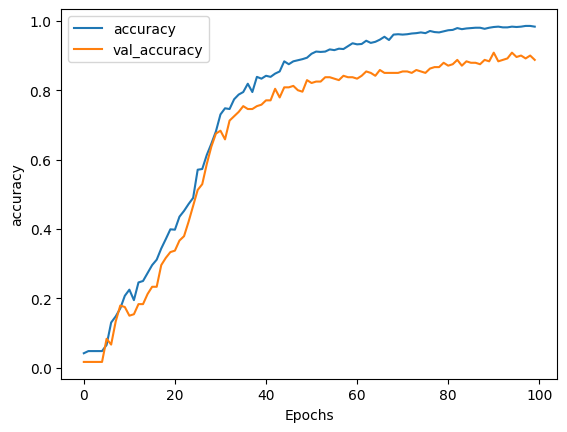

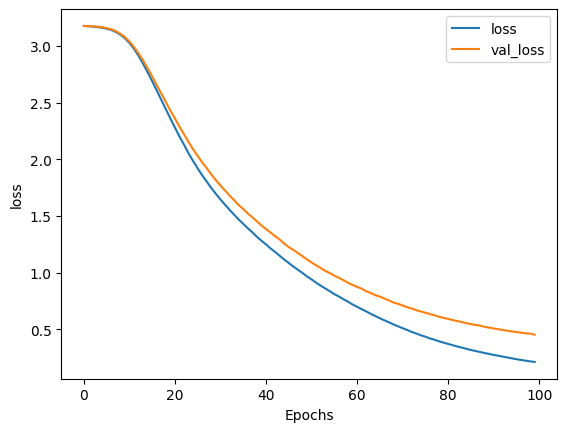

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
test = train_padded[10:15]
test_label = train_labels[10:15]

In [ ]:
prediction = model.predict_on_batch(
    test
)

In [ ]:
prediction

array([[1.08868612e-07, 1.64618536e-13, 1.46581539e-10, 9.96147054e-10,
        5.53797139e-03, 4.23295266e-09, 6.33497490e-03, 8.07835132e-09,
        2.41584761e-08, 3.84807481e-06, 8.40042921e-05, 2.66103027e-03,
        9.65996921e-01, 1.16323427e-07, 4.43735066e-12, 1.65821129e-05,
        1.83302034e-02, 1.01058499e-03, 6.84938994e-10, 5.19981825e-07,
        2.21049413e-05, 1.18089793e-09, 8.09510937e-07, 1.30035744e-07],
       [4.69577099e-10, 3.61820618e-08, 6.12791744e-04, 1.51405763e-03,
        3.34087992e-04, 6.49465146e-05, 4.22500400e-03, 2.14004672e-07,
        2.19598284e-10, 3.50718736e-04, 1.35139388e-07, 9.04686048e-11,
        2.73619549e-09, 2.69381985e-06, 5.89987758e-05, 1.72945519e-03,
        1.22723141e-04, 1.23438920e-04, 5.72240306e-03, 1.87873410e-03,
        8.04544315e-02, 1.98297482e-03, 4.81024534e-02, 8.52719724e-01],
       [3.80119862e-04, 2.08262782e-06, 4.45965416e-04, 1.18038704e-04,
        1.22430220e-01, 6.90109155e-04, 1.69565231e-02, 1.2893

In [ ]:
np.argsort(prediction)

array([[ 1, 14,  2, 18,  3, 21,  5,  7,  8,  0, 13, 23, 19, 22,  9, 15,
        20, 10, 17, 11,  4,  6, 16, 12],
       [11,  8,  0, 12,  1, 10,  7, 13, 14,  5, 16, 17,  4,  9,  2,  3,
        15, 19, 21,  6, 18, 22, 20, 23],
       [ 8,  1, 14, 11,  3, 13, 21,  0,  2, 23,  5,  7, 12, 18,  9, 22,
        15, 10,  6, 20, 19, 17,  4, 16],
       [ 8, 11, 14,  5,  0,  4, 15, 12,  2, 18,  6,  7, 16, 23,  9, 10,
        20, 22,  1, 19,  3, 17, 21, 13],
       [ 8, 11, 14,  5,  0, 12,  4, 15,  2,  6,  7, 18, 16, 10, 23,  9,
        20,  1, 22,  3, 19, 17, 21, 13]])

In [ ]:
label_encoder.inverse_transform(np.argsort(prediction[1])[-1:][::-1])

array(['urinary tract infection'], dtype=object)

In [ ]:
for i in prediction:
  top_3 = np.argsort(i)[-1:][::-1]
  print(label_encoder.inverse_transform(top_3))

['Malaria']
['urinary tract infection']
['Typhoid']
['Migraine']
['Migraine']


In [ ]:
test_label

array([[12],
       [23],
       [16],
       [13],
       [13]])

In [ ]:
label_encoder.inverse_transform(test_label)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Malaria', 'urinary tract infection', 'Typhoid', 'Migraine',
       'Migraine'], dtype=object)

In [ ]:
filepath = "keyword extraction/model.h5"

In [ ]:
model.save(filepath, save_format='h5')

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model, "keyword extraction/")

In [ ]:
test1 = ["My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms.", "The swelling in my legs is causing me to have difficulty fitting into my shoes. I can't sprint or stand for long periods of time. I can see some swollen blood vessels."]

In [ ]:
print(test1)

['My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms.', "The swelling in my legs is causing me to have difficulty fitting into my shoes. I can't sprint or stand for long periods of time. I can see some swollen blood vessels."]


In [ ]:
testing = []
for i in test1:
  testing.append(sen(keywords(i)))

In [ ]:
print(testing)

['often feel inflammatory small dents minor rashes touch tender pits nails even arms', 'swollen blood vessels long periods difficulty fitting time swelling stand sprint shoes see legs causing']


In [ ]:
test_sequences = tokenizer.texts_to_sequences(testing)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
prediction = model.predict_on_batch(
    test_padded
)

In [ ]:
for i in prediction:
  top_3 = np.argsort(i)[-1:][::-1]
  print(label_encoder.inverse_transform(top_3))

['Psoriasis']
['Varicose Veins']


untuk pake modelnya: teks di ekstrak dulu keywordnya, trus di padding

Masih menjadi pertanyaan: kenapa modelnya cuma mau nerima input 2d?